In [ ]:
#This notebook includes the code for Course 5 Task 3 Classification Problem

In [1]:
import pandas as pd

In [16]:
#1 Cleaning and Pre-processing - already happened in a previous task and this data set will be used for the classification problem
credit = pd.read_csv('credit_data_pre_process.csv', header =0)

In [17]:
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,age_bucket,limit_bal_bucket
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,689,0,0,0,0,1,21-29,"10,000-50,000"
1,1,2,120000,2,2,2,26,-1,2,0,...,3261,0,1000,1000,1000,0,2000,1,21-29,"101,000-150,000"
2,2,3,90000,2,2,2,34,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,30-39,"51,000-100,000"
3,3,4,50000,2,2,1,37,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,30-39,"10,000-50,000"
4,4,5,50000,1,2,1,57,-1,0,-1,...,19131,2000,36681,10000,9000,689,679,0,50-59,"10,000-50,000"


In [18]:
#2 Covariance Estimation
covMat = credit.cov()
print(covMat)

              Unnamed: 0            ID     LIMIT_BAL          SEX  \
Unnamed: 0  7.500250e+07  7.500250e+07  2.941664e+07    78.356379   
ID          7.500250e+07  7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL   2.941664e+07  2.941664e+07  1.683446e+10  1571.050630   
SEX         7.835638e+01  7.835638e+01  1.571051e+03     0.239247   
EDUCATION   2.681543e+02  2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE   -1.314525e+02 -1.314525e+02 -7.323670e+03    -0.008014   
AGE         1.491057e+03  1.491057e+03  1.730767e+05    -0.409726   
PAY_0      -2.975726e+02 -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2      -1.162770e+02 -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3      -1.916922e+02 -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4      -2.769132e+01 -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5      -2.178600e+02 -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6      -2.018774e+02 -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1   1.236447e+07  1.236447

In [19]:
#3 EDA
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

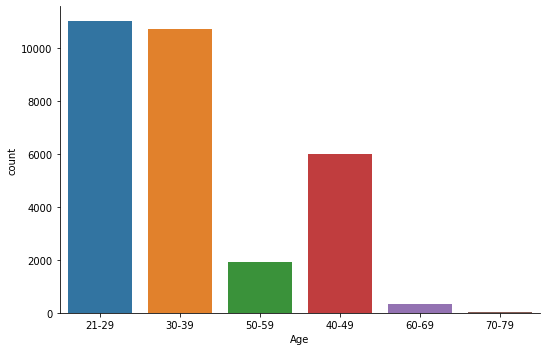

In [20]:
fg = sns.catplot('age_bucket', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Age')

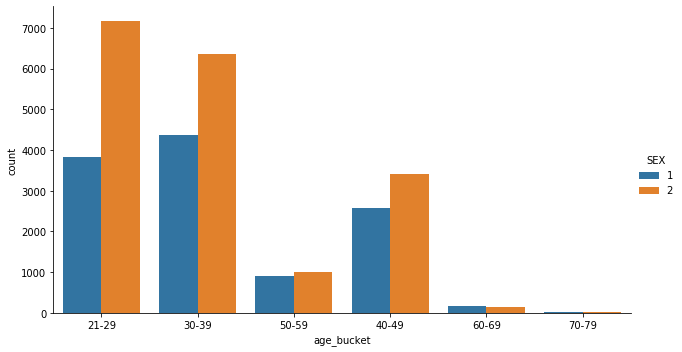

In [21]:
g = sns.catplot('age_bucket', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('age_bucket')

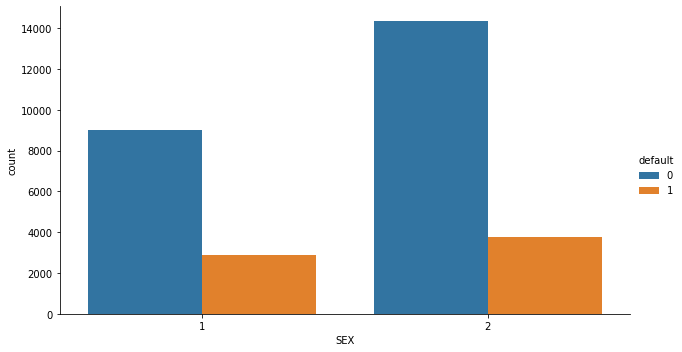

In [23]:
g = sns.catplot('SEX', data=credit, hue='default', kind='count', aspect=1.75)
g.set_xlabels('SEX')

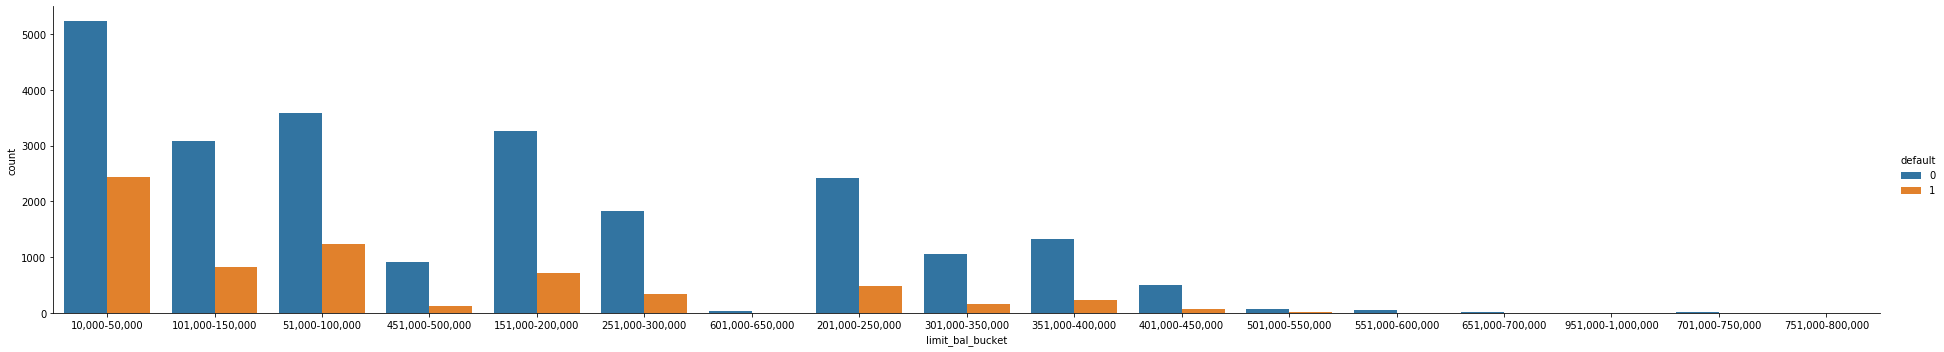

In [24]:
g = sns.catplot('limit_bal_bucket', data=credit, hue='default', kind='count', aspect=5.25)
g.set_xlabels('limit_bal_bucket')

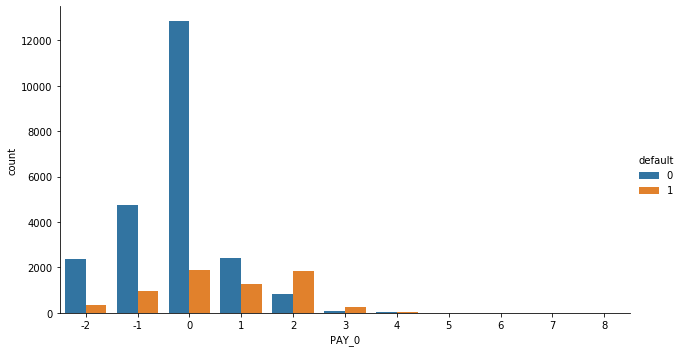

In [25]:
g = sns.catplot('PAY_0', data=credit, hue='default', kind='count', aspect=1.75)
g.set_xlabels('PAY_0')

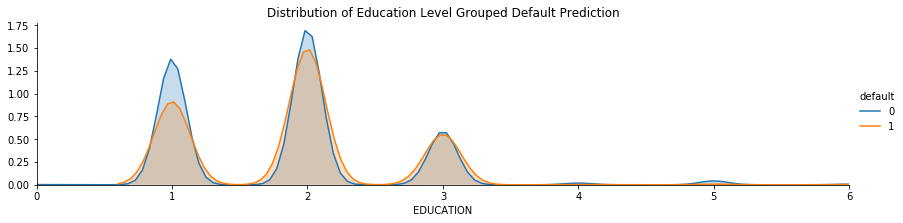

In [29]:
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'EDUCATION', shade=True)
oldest = credit['EDUCATION'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Education Level Grouped Default Prediction')
fig.add_legend()

In [75]:
#4 Feature Engineering
credit4= credit.copy()

In [76]:
credit4=credit4.drop(['age_bucket','limit_bal_bucket','Unnamed: 0'],axis=1)

In [77]:
credit4.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [78]:
#select the dependent variable
depVar = credit4['default']

In [79]:
#1. Select the features
features= credit4.iloc[:,1:25]
print(features)
print('Summary of feature sample')
features.head()

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [80]:
#Training Set (Feature Space: X Training)
X_train = (features[: 20000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [81]:
#4 One Hot Encoding N/A

In [82]:
#5 Classification

In [83]:
#dependent variable
depVar = credit4['default']

In [84]:
#Training Set (Feature Space: X Training)
X_train = (features[: 20000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [85]:
y_train = depVar[: 20000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 20000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [86]:
#Testing Set (X Testing)
X_test = features[-10000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))

The number of observations in the feature testing set is: 10000


In [87]:
y_test = depVar[-10000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 10000


20000    1
20001    0
20002    0
20003    0
20004    0
Name: default, dtype: int64

In [88]:
#cross validatiaon
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((15000, 24), (5000, 24))

In [89]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [110]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [144]:
#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [145]:
#cross validation
from sklearn.model_selection import train_test_split

In [124]:
#K Nearest Neighbours Fitting and Scoring
knn=KNeighborsClassifier()
knn=knn.fit(X_train,y_train)
print(cross_val_score(knn, X_train, y_train))
knn.score(X_train,y_train)
knn.score(X_train,y_train)

[0.732      0.74166667 0.74366667 0.74333333 0.73966667]


0.8135333333333333

In [148]:
y_pred = knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Classification Report : ' + str(classification_report(y_test,y_pred)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred)))

Accuracy Score : 0.7464
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.91      0.85      3855
           1       0.39      0.19      0.26      1145

    accuracy                           0.75      5000
   macro avg       0.59      0.55      0.55      5000
weighted avg       0.70      0.75      0.71      5000

Kappa : 0.12429608737149322


In [98]:
#SVC Fitting and Scoring
svc=SVC()
svc=svc.fit(X_train,y_train)

print(cross_val_score(svc, X_train, y_train))
svc.score(X_train,y_train)

[0.77233333 0.77233333 0.77233333 0.77266667 0.77266667]


0.7728

In [99]:
y_pred2 = svc.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred2)))
print('Classification Report : ' + str(classification_report(y_test,y_pred2)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred2)))

Accuracy Score : 0.7712
Classification Report :               precision    recall  f1-score   support

           0       0.77      1.00      0.87      3855
           1       1.00      0.00      0.00      1145

    accuracy                           0.77      5000
   macro avg       0.89      0.50      0.44      5000
weighted avg       0.82      0.77      0.67      5000

Kappa : 0.0013460877034625618


In [111]:
#Random Forest Fitting and Scoring
rf=RandomForestClassifier()
rf=rf.fit(X_train,y_train)

print(cross_val_score(rf, X_train, y_train))
rf.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [112]:
y_pred3 = rf.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred3)))
print('Classification Report : ' + str(classification_report(y_test,y_pred3)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred3)))

Accuracy Score : 1.0
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3855
           1       1.00      1.00      1.00      1145

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Kappa : 1.0


In [104]:
#7 Model Tuning 

In [115]:
#Random Forest Tuning 1
rf2 = RandomForestClassifier(max_depth=3)
rf2=rf2.fit(X_train,y_train)

print(cross_val_score(rf2, X_train, y_train))
rf2.score(X_train,y_train)

[0.92633333 0.89866667 0.959      0.94333333 0.936     ]


0.9995333333333334

In [116]:
y_pred4 = rf2.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred4)))
print('Classification Report : ' + str(classification_report(y_test,y_pred4)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred4)))

Accuracy Score : 0.999
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3855
           1       1.00      1.00      1.00      1145

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Kappa : 0.9971637320747867


In [151]:
#Random Forest Tuning 2
rf3 = RandomForestClassifier(max_depth=3, random_state= 32)
rf3=rf3.fit(X_train,y_train)

print(cross_val_score(rf3, X_train, y_train))
rf3.score(X_train,y_train)

[0.98466667 0.98866667 0.97533333 0.97633333 0.963     ]


0.9699333333333333

In [152]:
y_pred5 = rf3.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred5)))
print('Classification Report : ' + str(classification_report(y_test,y_pred5)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred5)))

Accuracy Score : 0.972
Classification Report :               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3855
           1       1.00      0.88      0.93      1145

    accuracy                           0.97      5000
   macro avg       0.98      0.94      0.96      5000
weighted avg       0.97      0.97      0.97      5000

Kappa : 0.9171455456853543


In [120]:
#SVC Tuning 1
svc2 = SVC(C=1,gamma=1,random_state = 123)
svc2=svc2.fit(X_train,y_train)

print(cross_val_score(svc2, X_train, y_train))
svc2.score(X_train,y_train)

[0.77266667 0.77233333 0.773      0.77333333 0.773     ]


1.0

In [121]:
y_pred6 = svc2.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred6)))
print('Classification Report : ' + str(classification_report(y_test,y_pred6)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred6)))

Accuracy Score : 0.7712
Classification Report :               precision    recall  f1-score   support

           0       0.77      1.00      0.87      3855
           1       1.00      0.00      0.00      1145

    accuracy                           0.77      5000
   macro avg       0.89      0.50      0.44      5000
weighted avg       0.82      0.77      0.67      5000

Kappa : 0.0013460877034625618


In [122]:
#SVC Tuning 2
svc3 = SVC(shrinking=True)
svc3=svc3.fit(X_train,y_train)

print(cross_val_score(svc3, X_train, y_train))
svc3.score(X_train,y_train)

[0.77233333 0.77233333 0.77233333 0.77266667 0.77266667]


0.7728

In [123]:
y_pred7 = svc3.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred7)))
print('Classification Report : ' + str(classification_report(y_test,y_pred7)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred7)))

Accuracy Score : 0.7712
Classification Report :               precision    recall  f1-score   support

           0       0.77      1.00      0.87      3855
           1       1.00      0.00      0.00      1145

    accuracy                           0.77      5000
   macro avg       0.89      0.50      0.44      5000
weighted avg       0.82      0.77      0.67      5000

Kappa : 0.0013460877034625618


In [126]:
#K Nearest Neighbours Tuning 1
knn2=KNeighborsClassifier(n_neighbors=4)
knn2=knn2.fit(X_train,y_train)
print(cross_val_score(knn2, X_train, y_train))
knn2.score(X_train,y_train)

[0.75333333 0.75633333 0.75966667 0.75966667 0.75633333]


0.8109333333333333

In [127]:
y_pred8 = knn2.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred8)))
print('Classification Report : ' + str(classification_report(y_test,y_pred8)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred8)))

Accuracy Score : 0.76
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.95      0.86      3855
           1       0.41      0.12      0.18      1145

    accuracy                           0.76      5000
   macro avg       0.60      0.53      0.52      5000
weighted avg       0.70      0.76      0.70      5000

Kappa : 0.09095454318193164


In [128]:
#K Nearest Neighbours Tuning 2
knn3=KNeighborsClassifier(leaf_size=20)
knn3=knn3.fit(X_train,y_train)
print(cross_val_score(knn3, X_train, y_train))
knn3.score(X_train,y_train)

[0.732      0.74133333 0.744      0.74333333 0.73966667]


0.8134666666666667

In [129]:
y_pred9 = knn3.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred9)))
print('Classification Report : ' + str(classification_report(y_test,y_pred9)))
print('Kappa : ' + str(cohen_kappa_score(y_test,y_pred9)))

Accuracy Score : 0.7462
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.91      0.85      3855
           1       0.39      0.19      0.25      1145

    accuracy                           0.75      5000
   macro avg       0.59      0.55      0.55      5000
weighted avg       0.70      0.75      0.71      5000

Kappa : 0.12327729861631187


In [130]:
#8 Model Evaluation
#RF with tuning parameters max_depth = 3 and random_state = 32 has the best accuracy and kappa without ovefit

In [153]:
print(cross_val_score(rf3,X_train,y_train))

[0.98466667 0.98866667 0.97533333 0.97633333 0.963     ]


In [169]:
y_pred5

array([0, 0, 1, ..., 0, 0, 0])

In [170]:
#export to csv file
np.savetxt('default_predictions.csv',predictions,delimiter=',')

In [173]:
default_predictions = pd.read_csv('default_predictions.csv', header =0)

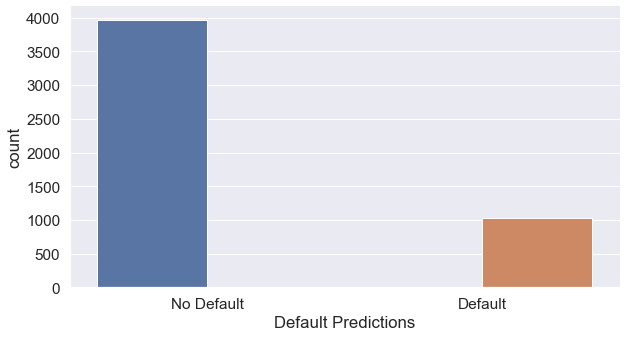

In [176]:
#A table that looks at the predictions for default
g = sns.catplot('default_predictions', data=default_predictions, hue='default_predictions', kind='count', aspect=1.75)
g.set_xlabels('Default Predictions')

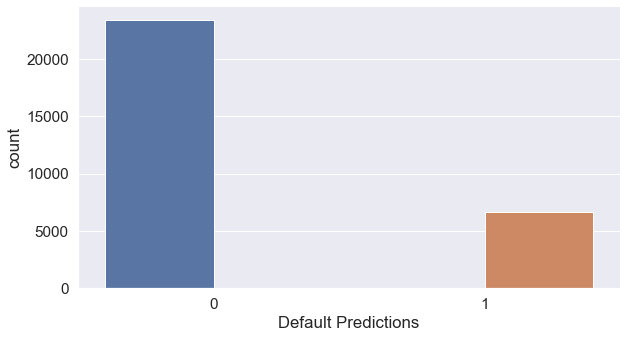

In [177]:
#A table that looks at the original data to compare the values. There is very similar ratios with the table above.
g = sns.catplot('default', data=credit3, hue='default', kind='count', aspect=1.75)
g.set_xlabels('Default Predictions')